In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, plot_roc_curve, plot_confusion_matrix, accuracy_score, roc_auc_score, make_scorer
from imblearn.over_sampling import SMOTE 
import sklearn
import matplotlib.pyplot as plt

os.chdir('../')
from Funciones.funciones import metrics 
from main import X, y
os.chdir('./Modelos')

X_cat: (54484, 6365) y_cat: (54484,)
X: (54849, 10114) y: (54849, 1)


In [5]:
#Separamos en train y test
#X = df3.drop(columns=['id_producto','label'], axis=1)
#Y = df3['label']
X.index = X['id_producto']
X.drop(columns=['id_producto'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

oversampling = SMOTE(sampling_strategy=0.30) # usamos oversampling sintético podemos elegir el nivel de oversampling con  sampling_strategy=0.80
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train) #Se obtienen nuevos X e y

In [14]:
#Lanzamos el modelo
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

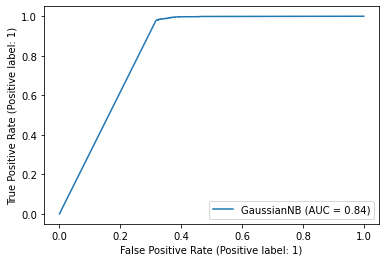

Train AUC 0.8380948221315201
              precision    recall  f1-score   support

           0       1.00      0.67      0.80     31010
           1       0.26      0.99      0.41      3592

    accuracy                           0.70     34602
   macro avg       0.63      0.83      0.61     34602
weighted avg       0.92      0.70      0.76     34602



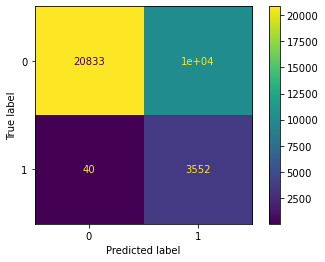

Test AUC 0.8367160547520115
              precision    recall  f1-score   support

           0       1.00      0.67      0.80     15260
           1       0.26      0.98      0.41      1784

    accuracy                           0.70     17044
   macro avg       0.63      0.83      0.61     17044
weighted avg       0.92      0.70      0.76     17044



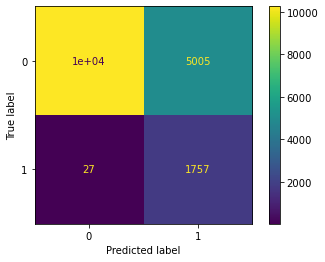

In [75]:
metrics(gnb, X_train, X_test, y_train, y_test, thr=0.6)

In [76]:
#La probabilidad a priori de pertenecer a cada clase
gnb.class_prior_  

array([0.9, 0.1])

In [79]:
#Probabilidad que tiene cada licitación de pertenecer a cada clase
pd.DataFrame(gnb.predict_proba(X_test))

,0,1
0,1.000000e+00,0.0
1,1.349138e-160,1.0
2,1.000000e+00,0.0
3,1.000000e+00,0.0
4,1.000000e+00,0.0
...,...,...
17039,1.000000e+00,0.0
17040,3.106993e-105,1.0
17041,1.457137e-76,1.0
17042,1.000000e+00,0.0


In [38]:
#Creamos un df de nuestro Y_test, reseteamos index para cuando al concatenarlo no nos arroje NANs
y_real= pd.DataFrame(y_test).reset_index()
y_real.drop(columns=['index'], inplace=True)

In [40]:
#fusionamos nuestras dos columnas por su index
prob= pd.merge(prob, y_real, left_index=True, right_index=True)


In [41]:
prob

,0,1,label
0,1.000000e+00,0.0,0
1,1.349138e-160,1.0,1
2,1.000000e+00,0.0,0
3,1.000000e+00,0.0,0
4,1.000000e+00,0.0,0
...,...,...,...
17039,1.000000e+00,0.0,0
17040,3.106993e-105,1.0,1
17041,1.457137e-76,1.0,0
17042,1.000000e+00,0.0,0


In [220]:
#Aciertos del y_test
prob[prob["label"] == 1]

,0,1,label
1,1.257069e-160,1.0,1
13,1.991946e-136,1.0,1
24,1.886862e-149,1.0,1
31,2.945603e-92,1.0,1
45,5.220049e-141,1.0,1
...,...,...,...
16975,8.414155e-116,1.0,1
16994,2.375948e-120,1.0,1
16995,3.727249e-144,1.0,1
17023,6.804503e-90,1.0,1


In [200]:
#Observamos la probabilidad de 1 cuando acierta un 100%
prob[prob[1] == 1].count()

0        6587
1        6587
label    6587
dtype: int64

In [42]:
prob[prob[1] < 0.7]

,0,1,label
0,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,True,False,False
...,...,...,...
17035,True,False,False
17036,True,False,False
17038,True,False,False
17039,True,False,False


In [196]:
# 1 cuando la probabilidad es < 0.70

prob[prob[1] < 0.7].count()

0        10295
1        10295
label    10295
dtype: int64

In [17]:
confusion_matrix(y_test, gnb.predict(X_test))

array([[10255,  5005],
       [   26,  1758]], dtype=int64)